In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
set(data.Gender)

{'F', 'M'}

In [4]:
set(data.Age)

{'0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'}

In [5]:
set(data.City_Category)

{'A', 'B', 'C'}

In [6]:
data = data.fillna(0)

In [7]:
data.shape

(537577, 12)

In [8]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [27]:
data.Gender = data.Gender.apply(lambda x: 1 if 'M' else 0)

In [10]:
def map_gender(gender):
    dct = {'F' : 0, 'M' : 1}
    return dct [gender]
    
data['Gender'] = data['Gender'].apply(map_gender)

In [11]:
def map_age(age):
    dct = {'0-17' : 1, '18-25' : 2, '26-35' : 3, '36-45' : 4, '46-50' : 5, '51-55' : 6, '55+' : 7}
    return dct [age]
    
data['Age'] = data['Age'].apply(map_age)

In [12]:
data = pd.get_dummies(data, columns=['City_Category'], drop_first=True)

In [13]:
def map_stay(years):
    if years == '4+':
        return 4
    
    
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)
    

C:\Users\User\AppData\Local\Temp\ipykernel_19820\3717052692.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase', data=data, palette='deep')


<Axes: xlabel='Gender', ylabel='Purchase'>

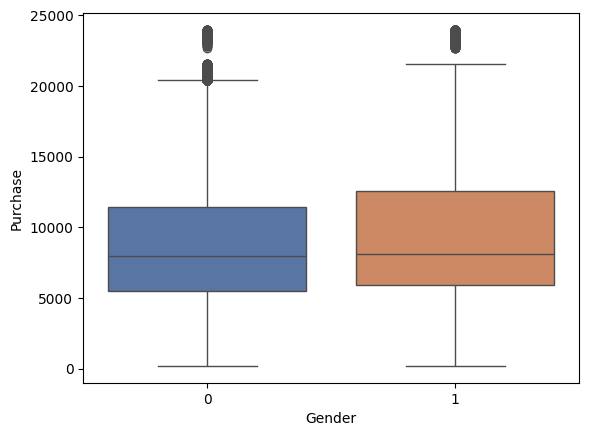

In [25]:
sns.boxplot(x='Gender', y='Purchase', data=data, palette='deep')


<Axes: xlabel='Age', ylabel='Purchase'>

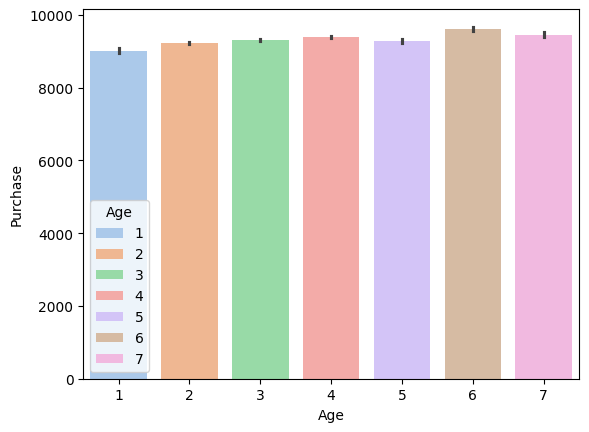

In [23]:

sns.barplot(x='Age', y='Purchase', data=data, palette='pastel', hue='Age')


In [16]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,0,1,10,NaN,0,3,0.0,0.0,8370,False,False
1,1000001,P00248942,0,1,10,NaN,0,1,6.0,14.0,15200,False,False
2,1000001,P00087842,0,1,10,NaN,0,12,0.0,0.0,1422,False,False
3,1000001,P00085442,0,1,10,NaN,0,12,14.0,0.0,1057,False,False
4,1000002,P00285442,1,7,16,4.0,0,8,0.0,0.0,7969,False,True


<Axes: xlabel='City_Category_B', ylabel='Purchase'>

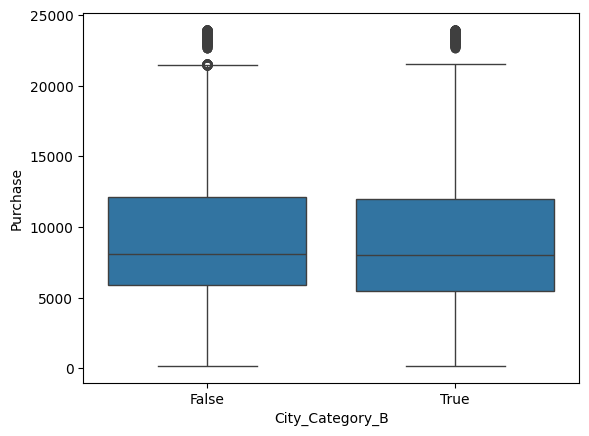

In [17]:
sns.boxplot(x='City_Category_B', y='Purchase', data=data)

<Axes: xlabel='City_Category_C', ylabel='Purchase'>

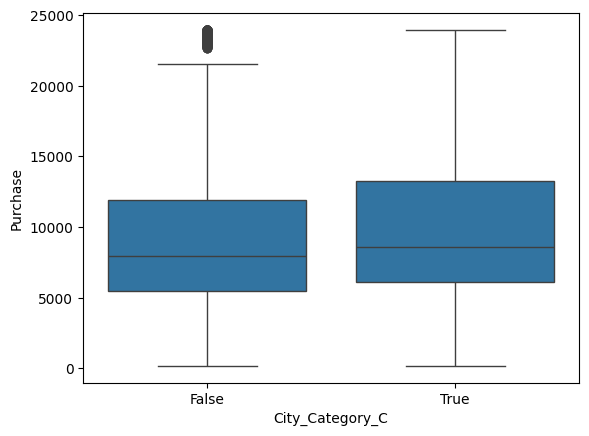

In [20]:
sns.boxplot(x='City_Category_C', y='Purchase', data=data)

In [98]:
del data['Product_ID']

In [18]:
del data['User_ID']

In [63]:
X = data.copy().drop('Purchase', axis=1)

y = data['Purchase']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)


In [22]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.13408435287515463, 0.13337304377633408)

In [23]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,0.000000
1,Age,133.080097
2,Occupation,63.722373
3,Stay_In_Current_City_Years,12.515096
4,Marital_Status,-23.264045
5,Product_Category_1,-1202.040063
6,Product_Category_2,51.168591
7,Product_Category_3,930.443224
8,City_Category_B,69.105479
9,City_Category_C,309.402089


In [55]:
regressor.coef_

array([    0.        ,   133.08009732,    63.72237285,    12.51509567,
         -23.26404518, -1202.04006321,    51.16859053,   930.44322443,
          69.10547935,   309.4020887 ])

In [27]:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.13332706271538786 21564998.42807389
[    0.           120.96615853    55.22649274     2.80370858
    -8.81922077 -1194.57314544    42.575407     924.74597025
    46.54909769   288.31467883] 



In [28]:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.13337302350056734 21563854.808355875
[    0.           132.95907415    63.63742068    12.41798079
   -23.1195847  -1201.96539218    51.08266095   930.38628884
    68.87898904   309.19067006] 

alpha=25.1
Scores: 0.13313954064596 21569664.44792806
[    0.           106.73782394    42.19250577     0.
    -0.         -1183.44282524    29.51775653   916.10287356
    12.59118791   256.37801966] 

alpha=50.1
Scores: 0.13276447248105983 21578997.0854647
[    0.            85.73178195    20.41281121     0.
    -0.         -1164.57148788     7.68892283   901.40239028
     0.           228.65569333] 

alpha=75.1
Scores: 0.13225951427774374 21591561.713240977
[    0.            63.72630121     0.             0.
     0.         -1145.39167025     0.           885.36985057
     0.           207.97827389] 



In [29]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

In [30]:
lasso_cv.coef_

array([   0.        ,  102.06026819,    9.49008837,    7.61846192,
        -51.36368302, -319.92912355,    7.95519003,  149.04385347,
        141.87684203,  656.61452162])

In [31]:
lasso_cv.alpha_

0.1

In [32]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.13408434841936712 0.13337302350056734


In [33]:
from sklearn.linear_model import Ridge

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=0.1
Scores: 0.13337304374100478 21563854.30472298
[    0.           133.08005586    63.72236728    12.51509112
   -23.26402852 -1202.03983162    51.16860216   930.4431
    69.10540309   309.40198684]
alpha=2.6
Scores: 0.1333730428551203 21563854.32676601
[    0.           133.07901952    63.72222796    12.51497743
   -23.26361196 -1202.03404189    51.16889284   930.43998936
    69.10349666   309.39944049]
alpha=5.1
Scores: 0.1333730419641288 21563854.348936114
[    0.           133.07798319    63.72208864    12.51486373
   -23.2631954  -1202.02825222    51.16918352   930.43687873
    69.10159029   309.39689419]
alpha=7.6
Scores: 0.13337304106803094 21563854.371233277
[    0.           133.07694687    63.72194932    12.51475004
   -23.26277886 -1202.02246262    51.16947418   930.43376812
    69.09968397   309.39434795]


In [34]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [35]:
ridge_cv.alpha_

49.9450511585514

In [61]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.13344831026611492 0.1327672394498064


In [62]:
from sklearn.linear_model import ElasticNet


In [74]:
regressor3 = ElasticNet(alpha=0.5, l1_ratio=0.5)
regressor3.fit(Xtrain, ytrain)
ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)
print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.13081753475024116 0.13008357702317608


In [75]:
regressor3.coef_

array([   0.        ,   98.6475195 ,   57.09247496,    8.58703218,
        -11.37370486, -998.93774231,   57.99956569,  808.60912255,
         19.37870098,  234.55025783])

In [71]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor3.coef_))], axis = 1)
coefficients

,0,0
0,Gender,0.000000
1,Age,98.647520
2,Occupation,57.092475
3,Stay_In_Current_City_Years,8.587032
4,Marital_Status,-11.373705
5,Product_Category_1,-998.937742
6,Product_Category_2,57.999566
7,Product_Category_3,808.609123
8,City_Category_B,19.378701
9,City_Category_C,234.550258


In [76]:
len(data),len(Xtest)

(537577, 107516)

Задание 2 

In [2]:
data = pd.read_csv('affairs.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [5]:
set(data.age)

{17.5, 22.0, 27.0, 32.0, 37.0, 42.0}

In [6]:
set(data.yrs_married)

{0.5, 2.5, 6.0, 9.0, 13.0, 16.5, 23.0}

In [7]:
set(data.educ)

{9.0, 12.0, 14.0, 16.0, 17.0, 20.0}

In [8]:
import seaborn as sns
import numpy as np
import matplotlib as plt

rate_marriage


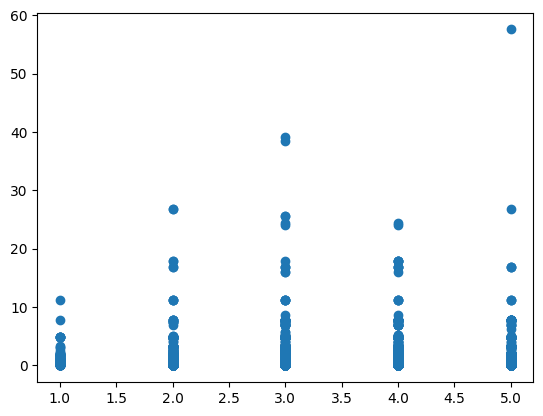

age


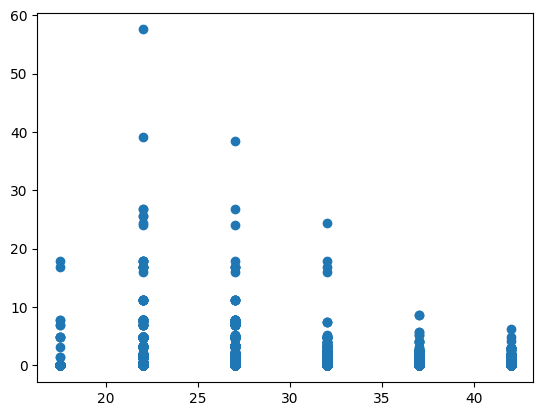

yrs_married


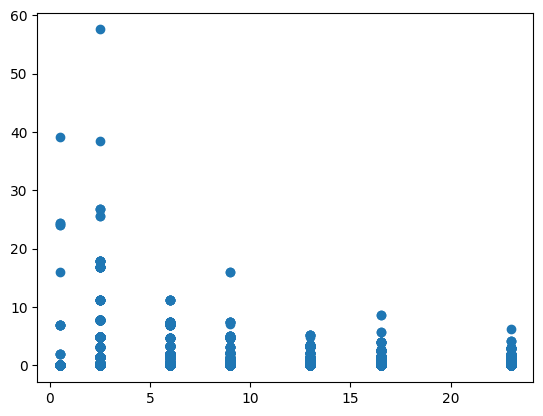

children


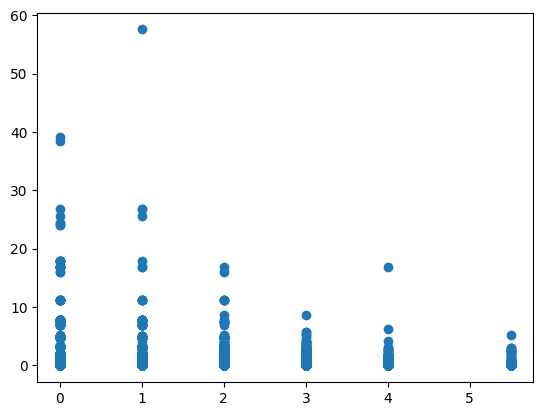

religious


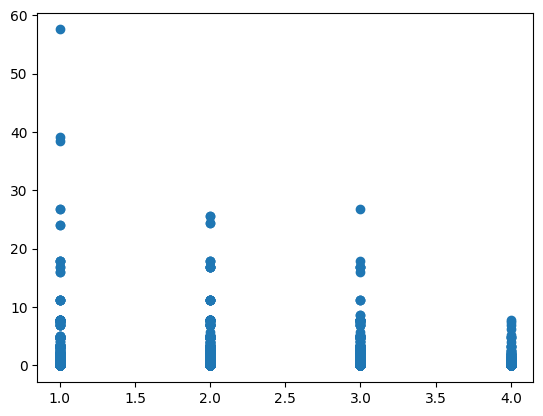

educ


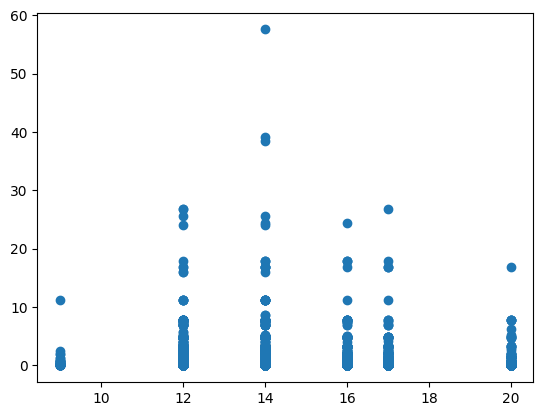

occupation


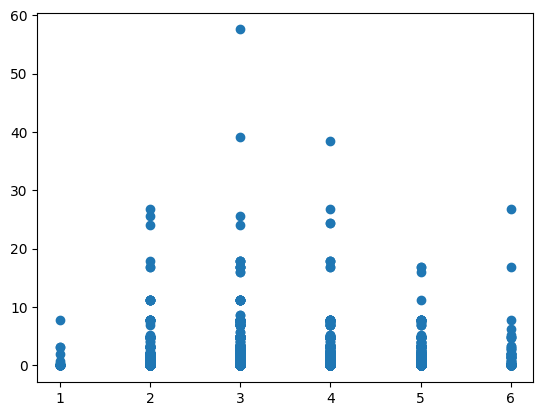

occupation_husb


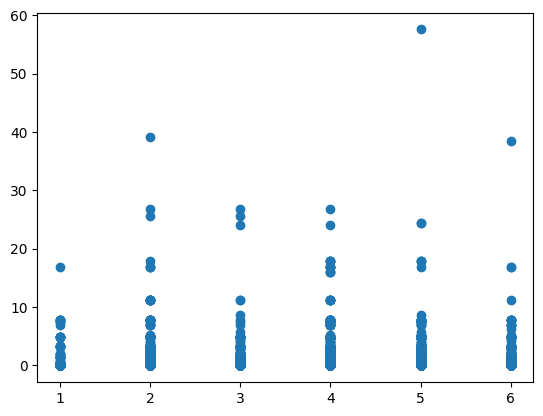

In [9]:
for c in data.columns:
    if c != 'affairs':
        print(c)
        plt.pyplot.scatter(data[c], data['affairs'])
        plt.pyplot.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4556\1170814275.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate_marriage', y='affairs', data=data, palette='muted')


<Axes: xlabel='rate_marriage', ylabel='affairs'>

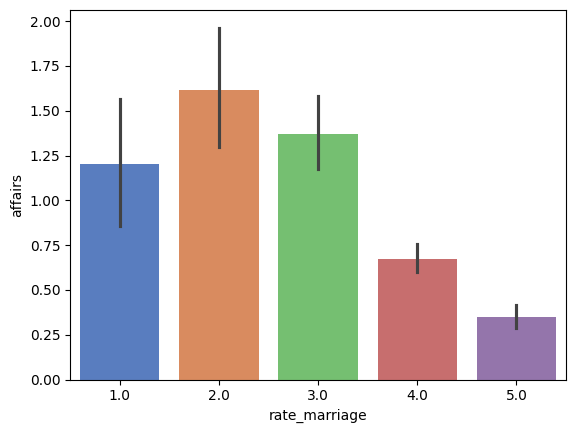

In [10]:
sns.barplot(x='rate_marriage', y='affairs', data=data, palette='muted')

<Axes: xlabel='age', ylabel='affairs'>

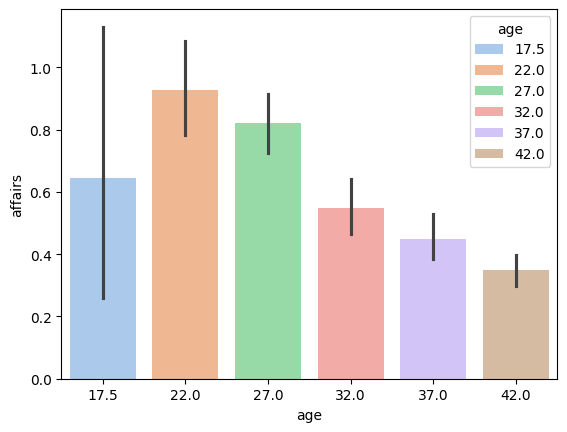

In [39]:
sns.barplot(x='age', y='affairs', data=data, palette='pastel', hue='age')

<Axes: xlabel='yrs_married', ylabel='affairs'>

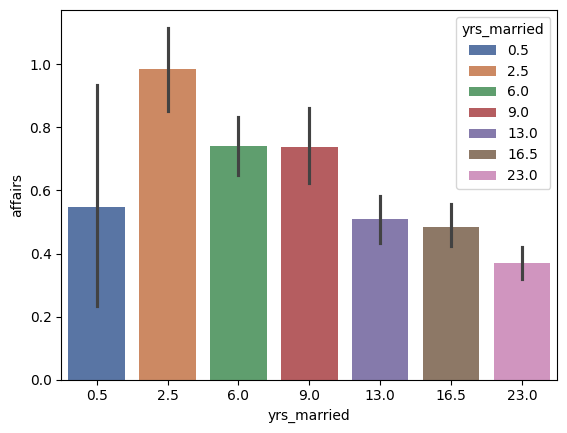

In [40]:
sns.barplot(x='yrs_married', y='affairs', data=data, palette='deep', hue='yrs_married')

<Axes: xlabel='children', ylabel='affairs'>

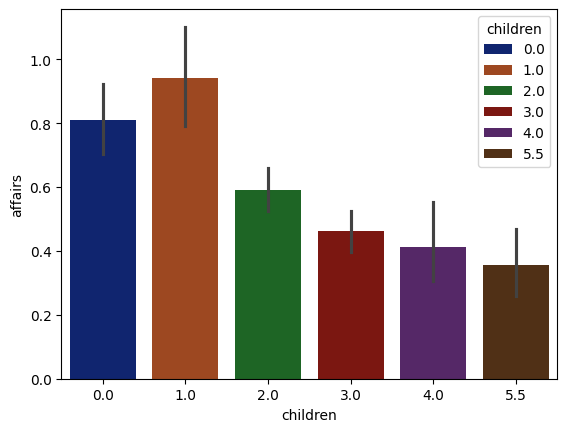

In [41]:
sns.barplot(x='children', y='affairs', data=data, palette='dark', hue='children')

<Axes: xlabel='religious', ylabel='affairs'>

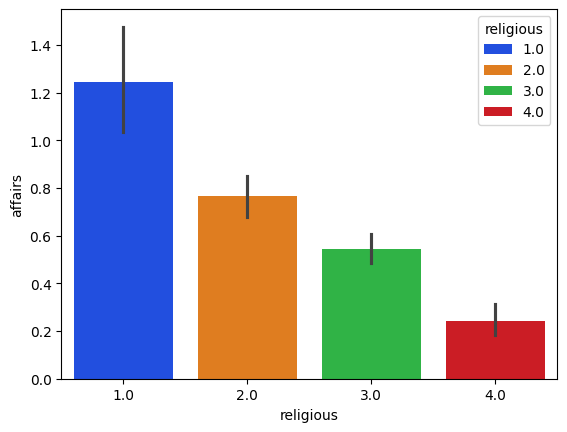

In [42]:
sns.barplot(x='religious', y='affairs', data=data, palette='bright', hue='religious')

<Axes: xlabel='educ', ylabel='affairs'>

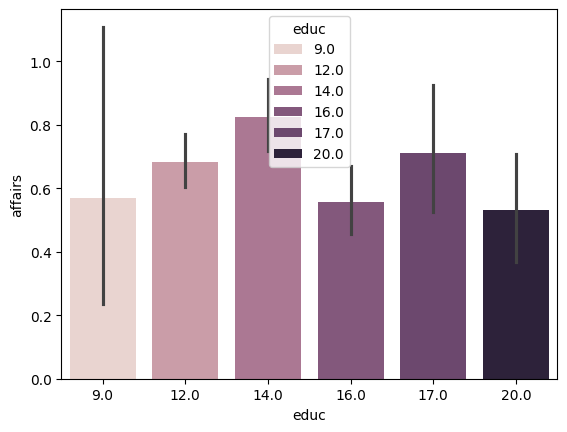

In [43]:
sns.barplot(x='educ', y='affairs', data=data, hue='educ')

<Axes: xlabel='occupation', ylabel='affairs'>

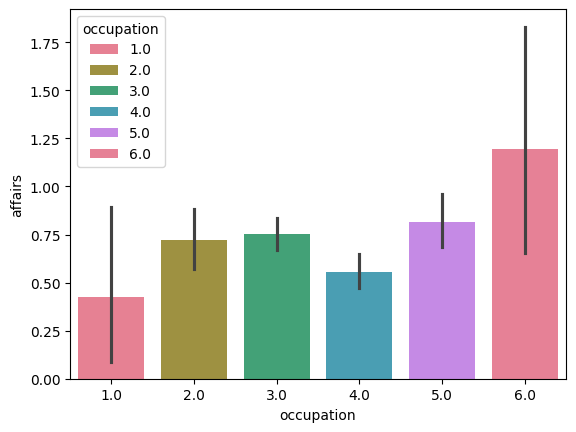

In [46]:
sns.barplot(x='occupation', y='affairs', data=data, palette='husl', hue='occupation')

<Axes: xlabel='occupation_husb', ylabel='affairs'>

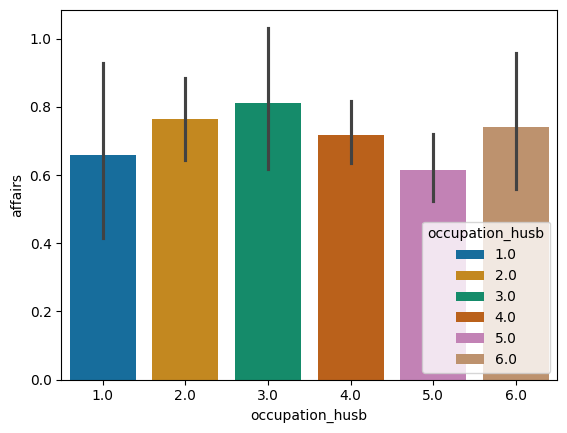

In [48]:
sns.barplot(x='occupation_husb', y='affairs', data=data, palette='colorblind', hue='occupation_husb')

<Axes: >

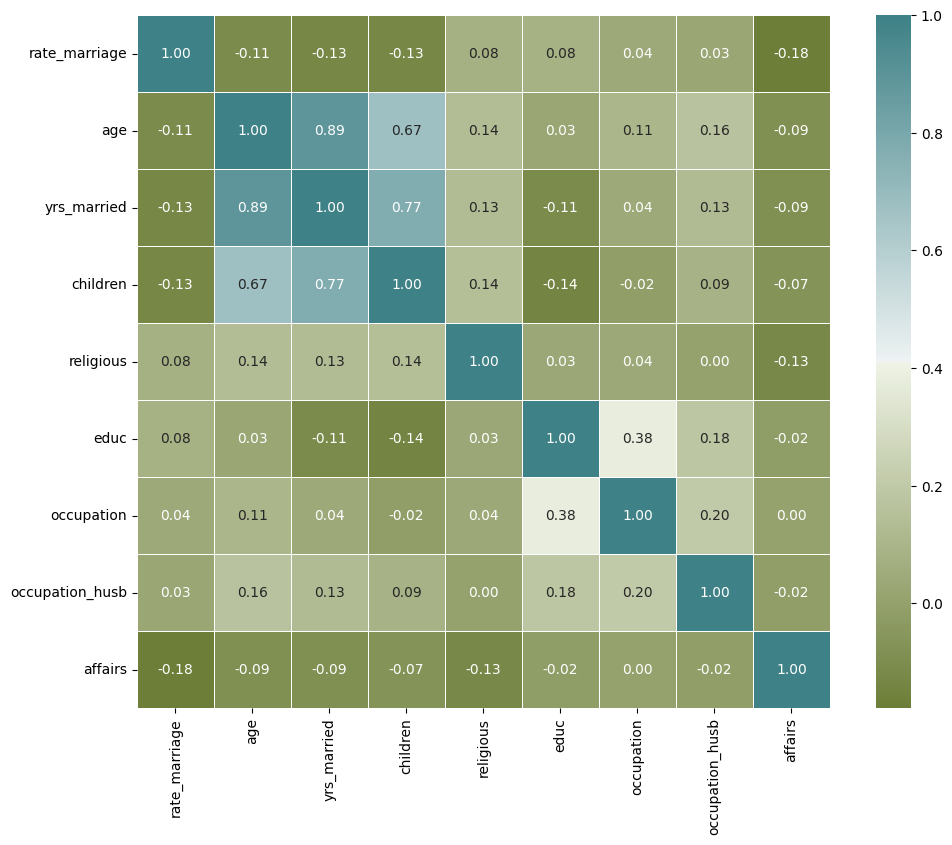

In [11]:

plt.pyplot.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [12]:
del data['yrs_married'] 
# yrs_married и  age сильно коррелируют между собой, значит нужно удалить один из них. Они оба довольно сильно коррелируют и признаком children, но age  чуть меньше чем yrs_married, поэтому удаляю именно yrs_married

In [13]:
del data['occupation'] 
# occupation вообще не коррелирует с таргетом, поэтому удаляю

In [52]:
data.drop(['occupation_husb', 'educ'], axis=1, inplace=True)
# occupation_husb и educ очень слабо коррелируют с таргетом значит их можно удалить

In [53]:
X = data.copy().drop('affairs', axis=1)

y = data['affairs']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)


In [54]:
print(mean_squared_error(ytrain,ypred_train) ** 0.5, mean_squared_error(ytest,ypred_test) ** 0.5)

2.13945935280251 2.158928310301941


In [55]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.0518328739258912, 0.06031228355613061)

In [56]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,rate_marriage,-0.390934
1,age,-0.142908
2,children,-0.073807
3,religious,-0.226526


In [57]:
regressor.coef_

array([-0.39093389, -0.14290821, -0.07380666, -0.226526  ])

In [58]:
regressor2 = Lasso(alpha=10) # добавить L1 регуляризацию
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')



Scores: -5.405256897472732e-05 4.960396209225496
[-0. -0. -0. -0.] 



In [59]:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.05097083716639805 4.707306219770116
[-0.28096482 -0.08421892 -0.01019183 -0.15180959] 

alpha=25.1
Scores: -5.405256897472732e-05 4.960396209225496
[-0. -0. -0. -0.] 

alpha=50.1
Scores: -5.405256897472732e-05 4.960396209225496
[-0. -0. -0. -0.] 

alpha=75.1
Scores: -5.405256897472732e-05 4.960396209225496
[-0. -0. -0. -0.] 



In [60]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=10, random_state=17)
lasso_cv.fit(X, y)


LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=10, random_state=17)

In [61]:
lasso_cv.coef_

array([-0.31401907, -0.0294742 , -0.        , -0.12779745])

In [62]:
lasso_cv.alpha_

0.1

In [63]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.04547353412860755 0.05097083716639805


In [65]:
from sklearn.linear_model import Ridge # добавить L2 регуляризацию

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=0.1
Scores: 0.060312090987767464 4.6609724041869445
[-0.3909261  -0.14290476 -0.07380704 -0.22652252]
alpha=2.6
Scores: 0.060307269258951246 4.660996320579544
[-0.39073145 -0.1428186  -0.07381657 -0.22643559]
alpha=5.1
Scores: 0.06030243309710315 4.66102030856183
[-0.39053699 -0.14273261 -0.07382599 -0.22634872]
alpha=7.6
Scores: 0.06029758254332873 4.661044367929915
[-0.39034272 -0.14264679 -0.0738353  -0.22626191]


In [71]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=10)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=10, scoring='neg_mean_squared_error')

In [72]:
ridge_cv.alpha_

0.01

In [73]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.051769318654944496 0.0599398246681252


In [74]:
from sklearn.linear_model import ElasticNet # теперь можно одновременно добавить обе ругуляризации

regressor3 = ElasticNet(alpha=0.5, l1_ratio=0.5)
regressor3.fit(Xtrain, ytrain)
ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)
print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.016451489101890093 0.01817428745415406


Задание 3

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
del data['id'] # можно сразу удалить столбец id

In [4]:
set(data.date)

{'20140502T000000',
 '20140503T000000',
 '20140504T000000',
 '20140505T000000',
 '20140506T000000',
 '20140507T000000',
 '20140508T000000',
 '20140509T000000',
 '20140510T000000',
 '20140511T000000',
 '20140512T000000',
 '20140513T000000',
 '20140514T000000',
 '20140515T000000',
 '20140516T000000',
 '20140517T000000',
 '20140518T000000',
 '20140519T000000',
 '20140520T000000',
 '20140521T000000',
 '20140522T000000',
 '20140523T000000',
 '20140524T000000',
 '20140525T000000',
 '20140526T000000',
 '20140527T000000',
 '20140528T000000',
 '20140529T000000',
 '20140530T000000',
 '20140531T000000',
 '20140601T000000',
 '20140602T000000',
 '20140603T000000',
 '20140604T000000',
 '20140605T000000',
 '20140606T000000',
 '20140607T000000',
 '20140608T000000',
 '20140609T000000',
 '20140610T000000',
 '20140611T000000',
 '20140612T000000',
 '20140613T000000',
 '20140614T000000',
 '20140615T000000',
 '20140616T000000',
 '20140617T000000',
 '20140618T000000',
 '20140619T000000',
 '20140620T000000',


In [4]:
del data['date'] # удалить столбец date, потому что разница во времени между датами не такая большая, чтобы как-то влиять на результат

In [6]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

<Axes: >

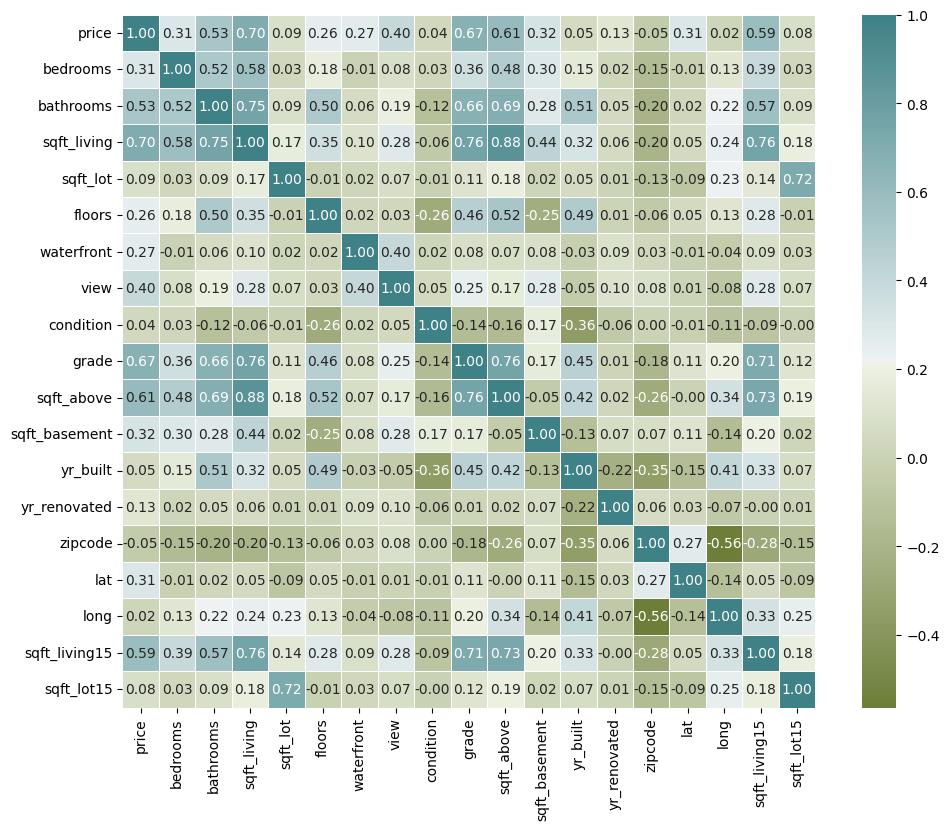

In [5]:
import seaborn as sns
import numpy as np
import matplotlib as plt

plt.pyplot.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [10]:
del data['sqft_above'] # sqft_above и sqft_living сильно коррелируют друг сдругом, поэтому убираю один из этих столбцов

In [11]:
# condition, yr_built и zipcode слабо коррелируют с таргетом, значит их можно удалить
data.drop(['condition', 'yr_built', 'zipcode'], axis=1, inplace=True)


In [12]:
# long очень слобо коррелирует с таргетом, тот столбец можно убрать
del data['long']

In [13]:
# если нет долготы, то можно убрать и широту
del data['lat']

In [14]:
del data['sqft_lot15'] # довольно слабо коррелирует с таргетом, при этом довольно сильно с sqft_lot

In [15]:
X = data.copy().drop('price', axis=1)

y = data['price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [16]:
print(mean_squared_error(ytrain,ypred_train) ** 0.5, mean_squared_error(ytest,ypred_test) ** 0.5)

227479.17962313062 247546.27173241365


In [17]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.6016183331110863, 0.6027129407468361)

In [18]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,bedrooms,-25788.856113
1,bathrooms,-11982.588031
2,sqft_living,153748.607343
3,sqft_lot,-11683.651254
4,floors,-6358.213401
5,waterfront,51224.256167
6,view,47070.893807
7,grade,115430.521509
8,sqft_basement,17511.003223
9,yr_renovated,26309.853533


In [19]:
regressor.coef_

array([-25788.85611308, -11982.58803069, 153748.60734272, -11683.65125384,
        -6358.21340119,  51224.25616677,  47070.89380697, 115430.52150878,
        17511.00322285,  26309.85353331,  12812.4500525 ])

In [20]:
regressor2 = Lasso(alpha=10) # добавить L1 регуляризацию
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')


Scores: 0.6027051271116961 61280361855.18232
[-25771.44766373 -11946.80703469 153713.15052276 -11668.60416319
  -6349.16181127  51217.95105268  47070.84961666 115415.24191225
  17507.39350708  26300.41559243  12809.51987357] 



In [21]:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.6027128674954996 61279167947.19924
[-25788.64777093 -11982.36385696 153748.23651657 -11683.49696511
  -6358.09049011  51224.19454017  47070.88664615 115430.45177824
  17511.00088904  26309.76295855  12812.42199336] 

alpha=25.1
Scores: 0.6026925256930021 61282305548.77152
[-25743.95847915 -11891.48014379 153654.98405322 -11645.66779944
  -6335.54535785  51208.6332528   47070.43449929 115392.76931391
  17502.75194342  26286.28732447  12806.86864122] 

alpha=50.1
Scores: 0.602671488305176 61285550440.227325
[-25698.28650595 -11799.8722577  153558.17822326 -11607.66727832
  -6312.97552777  51193.22921586  47069.70395211 115355.70692407
  17495.18535317  26262.91282131  12802.66741095] 

alpha=75.1
Scores: 0.6026502598593934 61288824801.23211
[-25652.62561274 -11707.79403562 153461.08834941 -11569.66219647
  -6290.500947    51177.83562553  47068.96754955 115318.45247889
  17487.58102626  26239.53633736  12798.58915375] 



In [31]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

In [34]:
lasso_cv.coef_

array([-3.00823732e+04, -1.93488567e+04,  1.82355459e+02, -3.19203559e-01,
       -1.33622067e+04,  5.67749565e+05,  5.93265691e+04,  1.00721631e+05,
        3.94165630e+01,  6.56127233e+01,  9.80957063e+00])

In [35]:
lasso_cv.alpha_

0.1

In [36]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.6016183331101409 0.6027128674954996


In [26]:
from sklearn.linear_model import Ridge # добавить L2 регуляризацию

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=0.1
Scores: 0.6027121389336465 61279280323.514786
[-25788.04424712 -11981.07546615 153744.5245743  -11683.24418156
  -6357.64896683  51224.13080534  47070.80654352 115429.85505183
  17511.8939734   26309.7970651   12814.40632307]
alpha=2.6
Scores: 0.6026920940342821 61282372129.5516
[-25767.76471833 -11943.29344743 153642.56929832 -11673.07638498
  -6343.55044833  51220.99431903  47068.6278391  115413.18561717
  17534.13268304  26308.38339889  12863.26026191]
alpha=5.1
Scores: 0.6026720500109141 61285463800.471245
[-25747.51803856 -11905.57303654 153540.83263315 -11662.92587853
  -6329.47561254  51217.8531348   47066.45465887 115396.50086251
  17556.31373224  26306.96597236  12912.01282072]
alpha=7.6
Scores: 0.6026520069341622 61288555325.38098
[-25727.30409887 -11867.91406792 153439.31385463 -11652.79260763
  -6315.42438801  51214.70727457  47064.28697702 115379.80091272
  17578.43732015  26305.54480153  12960.66430377]


In [37]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [38]:
ridge_cv.alpha_

3.739937302478798

In [39]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.6016183315610393 0.6027100577532334


In [40]:
from sklearn.linear_model import ElasticNet # теперь можно одновременно добавить обе регуляризации

regressor3 = ElasticNet(alpha=0.5, l1_ratio=0.5)
regressor3.fit(Xtrain, ytrain)
ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)
print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.5886711989287636 0.5764327733201109


In [41]:
regressor3.coef_

array([-8565.44118914, 15819.71127571, 90095.43905972, -3690.91185383,
        4476.02035545, 44675.4250127 , 44865.46332348, 90141.15555962,
       27684.95492018, 22704.14278929, 41177.59823786])